## Capstone Model 

Our capstone model is based off of american business data and using this data we determine the overall business health of the organizations.

Importing all the necessary functions 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sms
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

Uploading data from csv data pulled from kaggle database

In [2]:
df = pd.read_csv('DATA/american_bankruptcy_updated.csv', header=0)
df

C:\Users\ztillery\Anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,company_name,status_label,Final Year of Recorded Data,year,current_assets,cogs,depr_amort,ebitda,inventory,net_income,...,net_sales,total_assets,total_debt_long,ebit,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating_expenses
0,C_1,alive,N,1999,511.267,833.107,18.373,89.031,336.018,35.163,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,N,2000,485.856,713.811,18.577,64.367,320.590,18.531,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,N,2001,436.656,526.477,22.496,27.207,286.588,-58.939,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,N,2002,396.412,496.747,27.172,30.745,259.954,-12.410,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,N,2003,432.204,523.302,26.680,47.491,247.245,3.504,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,alive,NaN,2014,233.211,43.338,14.094,45.615,3.376,25.261,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,alive,NaN,2015,105.559,59.184,42.592,202.133,2.288,129.688,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,alive,NaN,2016,63.971,69.074,65.057,79.051,2.581,-1.442,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,alive,NaN,2017,135.207,66.527,65.330,69.171,2.013,-20.401,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


Creating ratios and rating that are built from financial data listed in the dataset. We determined these rations to cover three major aspects of business, Solvency, Liquidity, Profitability. These ratings were determined by comparing the results to that of other businesses. The solvency, liquidity, and profitability ratings are then added up to get the overall business health of the organization. This overal business helath is what will be used as the target variable for the model. 

In [3]:
df["EBIT/TOTAL_ASSETS"] = df["ebit"] / df["total_assets"]
df["NET_SALES/TOTAL_ASSETS"] = df["net_sales"] / df["total_assets"]
df["WORKING_CAPITAL/TOTAL_ASSETS"] = (df["current_assets"]- df["total_current_liabilities"]) / df["total_assets"]
df["SOLVENCY_RATING"] = 0
df["CURRENT_ASSETS/CURRENT_LIABILITIES"] = df["current_assets"] / df["total_current_liabilities"]
df["LIQUIDITY_RATING"] = 0 
df["NET_SALES-COGS"] = (df["net_sales"] - df["cogs"]) / df["net_sales"]
df["PROFITABILITY_RATING"] = 0
df["BUSINESS_HEALTH"] = 0

Dropping the categorical columns that do not effect the performance of the dataset as well as dropping the columns that were used to find the ratios that determine the necessary ratings. 

In [4]:
df = df.drop(columns = ['ebit'])
df = df.drop(columns = ['total_assets']) 
df = df.drop(columns = ['net_sales'])
df = df.drop(columns = ['total_current_liabilities'])
df = df.drop(columns = ['retained_earnings'])
df = df.drop(columns = ['status_label'])
df = df.drop(columns = ['current_assets'])
df = df.drop(columns = ['cogs'])


In [5]:
df 

,company_name,Final Year of Recorded Data,year,depr_amort,ebitda,inventory,net_income,total_receivables,market_value,total_debt_long,...,total_operating_expenses,EBIT/TOTAL_ASSETS,NET_SALES/TOTAL_ASSETS,WORKING_CAPITAL/TOTAL_ASSETS,SOLVENCY_RATING,CURRENT_ASSETS/CURRENT_LIABILITIES,LIQUIDITY_RATING,NET_SALES-COGS,PROFITABILITY_RATING,BUSINESS_HEALTH
0,C_1,N,1999,18.373,89.031,336.018,35.163,128.348,372.7519,180.447,...,935.302,0.095355,1.382369,0.468896,0,3.120983,0,0.186683,0,0
1,C_1,N,2000,18.577,64.367,320.590,18.531,115.187,377.1180,179.987,...,809.888,0.065241,1.245637,0.513588,0,3.874697,0,0.183521,0,0
2,C_1,N,2001,22.496,27.207,286.588,-58.939,77.528,364.5928,217.699,...,611.514,0.006633,0.899355,0.402974,0,2.902063,0,0.175732,0,0
3,C_1,N,2002,27.172,30.745,259.954,-12.410,66.322,143.3295,164.658,...,575.592,0.005204,0.883074,0.280849,0,1.947253,0,0.180741,0,0
4,C_1,N,2003,26.680,47.491,247.245,3.504,104.661,308.9071,248.666,...,604.467,0.029341,0.919167,0.424286,0,3.292707,0,0.197338,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,NaN,2014,14.094,45.615,3.376,25.261,22.846,756.4827,184.666,...,58.608,0.028679,0.094826,0.186529,0,8.270773,0,0.584180,0,0
78678,C_8971,NaN,2015,42.592,202.133,2.288,129.688,54.611,527.5750,770.103,...,89.020,0.085502,0.156037,0.009342,0,1.197792,0,0.796725,0,0
78679,C_8971,NaN,2016,65.057,79.051,2.581,-1.442,42.467,578.8868,683.985,...,90.807,0.008014,0.097271,-0.012481,0,0.745887,0,0.593343,0,0
78680,C_8971,NaN,2017,65.330,69.171,2.013,-20.401,27.217,412.6241,694.035,...,92.713,0.002212,0.093245,0.030641,0,1.648665,0,0.589045,0,0


Finding the solvency rating by testing the value of three ratios and comparing them to business averages. If the ratio's value is bad compared to average business the solvency rating stays at 0. If the value is good then the solvency rating increases by 1 and finally if the value of the raito is great then the solvency rating increases by 2. The solvency rating is a combination of three different ratios so this is done for all three of the ratios. This rating can have integer values from 0 to 5 

In [6]:
df.loc[((df['EBIT/TOTAL_ASSETS'] > .05 ) & (df['EBIT/TOTAL_ASSETS'] < .20)), ['SOLVENCY_RATING'] ] += 1
df.loc[((df['EBIT/TOTAL_ASSETS'] > .2)), ['SOLVENCY_RATING']] += 2

df.loc[((df['NET_SALES/TOTAL_ASSETS'] > .25 ) & (df['NET_SALES/TOTAL_ASSETS'] < .50)), ['SOLVENCY_RATING'] ] += 1
df.loc[((df['NET_SALES/TOTAL_ASSETS'] > .50 )), ['SOLVENCY_RATING']] += 2

df.loc[((df['WORKING_CAPITAL/TOTAL_ASSETS'] > 1.5 ) & (df['WORKING_CAPITAL/TOTAL_ASSETS'] < 2)), ['SOLVENCY_RATING'] ] += 1



In [7]:
df['SOLVENCY_RATING'].value_counts()

2    29287
3    28328
0     8744
1     7359
4     4964
Name: SOLVENCY_RATING, dtype: int64

A similar process is done for the liquidity rating however there is only one raito that determines the liquidity rating. This rating can have integer values from 0 to 2

In [8]:
df.loc[((df['CURRENT_ASSETS/CURRENT_LIABILITIES'] > 1.2 ) & (df['CURRENT_ASSETS/CURRENT_LIABILITIES'] < 2)), ['LIQUIDITY_RATING'] ] += 1
df.loc[((df['CURRENT_ASSETS/CURRENT_LIABILITIES'] > 2 )), ['LIQUIDITY_RATING'] ] += 2

In [9]:
df['LIQUIDITY_RATING'].value_counts()

2    37057
1    20844
0    20781
Name: LIQUIDITY_RATING, dtype: int64

A similar process is done for the profitability rating however there is only one raito that determines the profitability rating.This rating can have integer values from 0 to 2  

In [10]:
df.loc[((df['NET_SALES-COGS'] > .50 ) & (df['NET_SALES-COGS'] < .70)), ['PROFITABILITY_RATING'] ] += 1
df.loc[((df['NET_SALES-COGS'] > .70 )), ['PROFITABILITY_RATING']] += 2


In [11]:
df['PROFITABILITY_RATING'].value_counts()

0    55842
1    13767
2     9073
Name: PROFITABILITY_RATING, dtype: int64

The overall Business health is determined by adding the solvency rating, liquidity rating and profitability rating. This rating can have integer values from 0 to 9 

In [12]:
df["BUSINESS_HEALTH"] = (df['SOLVENCY_RATING'] + df['LIQUIDITY_RATING'] + df['PROFITABILITY_RATING'])

In [13]:
df['BUSINESS_HEALTH'].value_counts()

4    20691
5    16678
3    14622
2    12923
6     6634
1     2547
7     2125
0     1893
8      569
Name: BUSINESS_HEALTH, dtype: int64

Because this dataset has values from multiple years from each company we decided to keep only the first years performance for each company listed

df_co = df.drop_duplicates(subset=["company_name"], keep = 'last')

df_co

In [14]:
#df_company = df[df["company_name"].value_counts() > 1]
eligable_company = []

df_co = df.groupby('company_name')['year'].nunique()
eligable_company = df_co.loc[df.groupby('company_name')['year'].nunique() > 1]

comp_list = eligable_company.index.values.tolist()
df_company = df[df['company_name'].isin(comp_list)]

df_company = df_company.groupby('company_name').tail(2)
df_company



,company_name,Final Year of Recorded Data,year,depr_amort,ebitda,inventory,net_income,total_receivables,market_value,total_debt_long,...,total_operating_expenses,EBIT/TOTAL_ASSETS,NET_SALES/TOTAL_ASSETS,WORKING_CAPITAL/TOTAL_ASSETS,SOLVENCY_RATING,CURRENT_ASSETS/CURRENT_LIABILITIES,LIQUIDITY_RATING,NET_SALES-COGS,PROFITABILITY_RATING,BUSINESS_HEALTH
17,C_1,N,2016,71.000,148.200,601.100,56.500,251.400,1200.3288,155.300,...,1619.400,0.051326,1.175188,0.367928,3,2.651447,2,0.195123,0,5
18,C_1,Y,2017,40.500,126.500,547.900,15.600,203.000,1551.4580,177.200,...,1621.800,0.056405,1.146652,0.399685,3,2.828383,2,0.191672,0,5
29,C_2,NaN,2009,66.400,84.700,131.100,-474.300,200.300,805.6440,651.000,...,912.000,0.013620,0.741813,0.494344,2,3.814407,2,0.397512,0,4
30,C_2,NaN,2010,61.500,121.400,106.400,62.000,252.500,1231.5240,650.800,...,1035.200,0.040624,0.784401,0.555443,2,3.836855,2,0.414491,0,4
38,C_3,NaN,2007,0.500,-0.432,6.395,-4.673,5.031,30.4793,5.822,...,29.152,-0.034301,1.057009,0.264804,2,2.149545,2,0.387570,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78670,C_8969,NaN,2018,156.600,412.700,188.100,-324.400,382.400,2985.1014,5350.700,...,1548.300,0.027240,0.208584,0.142499,0,2.172604,2,0.507037,1,3
78675,C_8970,NaN,2017,62.100,567.300,239.800,273.300,308.800,7563.1327,1442.300,...,1840.900,0.198741,0.947364,0.224980,3,2.241102,2,0.472801,0,5
78676,C_8970,NaN,2018,82.500,619.000,280.300,434.900,340.300,7543.5153,1409.500,...,2112.700,0.190912,0.972066,0.146182,3,1.788786,1,0.459714,0,4
78680,C_8971,NaN,2017,65.330,69.171,2.013,-20.401,27.217,412.6241,694.035,...,92.713,0.002212,0.093245,0.030641,0,1.648665,1,0.589045,1,2


temp_df = df_company.loc[df['company_name'] == "C_2"]
temp_df.reset_index(inplace = True)   
temp_df.head()
for index, rows in temp_df.iterrows():
    if index == 0:
        print(temp_df['BUSINESS_HEALTH'][1])
    else:
        print(-1)

In [15]:
company_names = df_company.company_name.unique().tolist()
target = []
for company_name in company_names:
    temp_df = df_company.loc[df['company_name'] == company_name]
    temp_df.reset_index(inplace = True)
    for index, rows in temp_df.iterrows():
        if index == 0:
            #print(temp_df['BUSINESS_HEALTH'][1])
            target.append(temp_df['BUSINESS_HEALTH'][1])
        else:
            target.append(-1)

In [16]:
print(target)


[5, -1, 4, -1, 2, -1, 5, -1, 2, -1, 3, -1, 6, -1, 5, -1, 0, -1, 4, -1, 3, -1, 4, -1, 3, -1, 1, -1, 5, -1, 5, -1, 5, -1, 4, -1, 4, -1, 4, -1, 3, -1, 5, -1, 2, -1, 4, -1, 3, -1, 3, -1, 2, -1, 3, -1, 6, -1, 6, -1, 3, -1, 4, -1, 6, -1, 5, -1, 3, -1, 0, -1, 2, -1, 2, -1, 3, -1, 4, -1, 6, -1, 4, -1, 3, -1, 4, -1, 4, -1, 7, -1, 3, -1, 6, -1, 4, -1, 4, -1, 3, -1, 3, -1, 5, -1, 4, -1, 3, -1, 5, -1, 0, -1, 5, -1, 7, -1, 2, -1, 6, -1, 5, -1, 5, -1, 4, -1, 4, -1, 6, -1, 4, -1, 5, -1, 3, -1, 5, -1, 1, -1, 4, -1, 2, -1, 4, -1, 6, -1, 3, -1, 3, -1, 2, -1, 5, -1, 4, -1, 4, -1, 5, -1, 1, -1, 2, -1, 6, -1, 3, -1, 3, -1, 3, -1, 2, -1, 3, -1, 1, -1, 5, -1, 4, -1, 0, -1, 5, -1, 4, -1, 3, -1, 6, -1, 3, -1, 4, -1, 3, -1, 1, -1, 3, -1, 5, -1, 4, -1, 4, -1, 5, -1, 4, -1, 4, -1, 2, -1, 5, -1, 5, -1, 2, -1, 0, -1, 4, -1, 4, -1, 3, -1, 2, -1, 5, -1, 4, -1, 5, -1, 2, -1, 2, -1, 3, -1, 4, -1, 5, -1, 4, -1, 5, -1, 4, -1, 3, -1, 3, -1, 5, -1, 2, -1, 5, -1, 4, -1, 4, -1, 5, -1, 5, -1, 3, -1, 3, -1, 3, -1, 5, -1, 2, -1

In [23]:
df_company['NEXT_YEAR_BUSINESS_HEALTH'] = target
df_company = df_company.query("NEXT_YEAR_BUSINESS_HEALTH != -1")

## TESTING CELLS for past 4 years 

In [51]:
eligable_company1 = []


df_co1 = df.groupby('company_name')['year'].nunique()
eligable_company1 = df_co1.loc[df.groupby('company_name')['year'].nunique() > 4]

comp_list1 = eligable_company1.index.values.tolist()
df_company1 = df[df['company_name'].isin(comp_list1)]

df_company1 = df_company1.groupby('company_name').tail(5)
df_company1


,company_name,Final Year of Recorded Data,year,depr_amort,ebitda,inventory,net_income,total_receivables,market_value,total_debt_long,...,total_operating_expenses,EBIT/TOTAL_ASSETS,NET_SALES/TOTAL_ASSETS,WORKING_CAPITAL/TOTAL_ASSETS,SOLVENCY_RATING,CURRENT_ASSETS/CURRENT_LIABILITIES,LIQUIDITY_RATING,NET_SALES-COGS,PROFITABILITY_RATING,BUSINESS_HEALTH
14,C_1,N,2013,113.400,256.000,632.900,72.900,297.900,961.3080,564.300,...,1779.000,0.064833,0.925210,0.324983,3,2.777667,2,0.222899,0,5
15,C_1,N,2014,92.300,83.700,566.700,10.200,231.100,1046.3954,85.000,...,1510.600,-0.005677,1.052343,0.357822,2,2.315777,2,0.157812,0,4
16,C_1,N,2015,70.800,136.900,563.700,47.700,242.700,842.5112,136.100,...,1525.700,0.045836,1.152902,0.377297,2,2.653799,2,0.185072,0,4
17,C_1,N,2016,71.000,148.200,601.100,56.500,251.400,1200.3288,155.300,...,1619.400,0.051326,1.175188,0.367928,3,2.651447,2,0.195123,0,5
18,C_1,Y,2017,40.500,126.500,547.900,15.600,203.000,1551.4580,177.200,...,1621.800,0.056405,1.146652,0.399685,3,2.828383,2,0.191672,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,NaN,2014,14.094,45.615,3.376,25.261,22.846,756.4827,184.666,...,58.608,0.028679,0.094826,0.186529,0,8.270773,2,0.584180,1,3
78678,C_8971,NaN,2015,42.592,202.133,2.288,129.688,54.611,527.5750,770.103,...,89.020,0.085502,0.156037,0.009342,1,1.197792,0,0.796725,2,3
78679,C_8971,NaN,2016,65.057,79.051,2.581,-1.442,42.467,578.8868,683.985,...,90.807,0.008014,0.097271,-0.012481,0,0.745887,0,0.593343,1,1
78680,C_8971,NaN,2017,65.330,69.171,2.013,-20.401,27.217,412.6241,694.035,...,92.713,0.002212,0.093245,0.030641,0,1.648665,1,0.589045,1,2


In [52]:
company_names1 = df_company1.company_name.unique().tolist()
target1 = []
for company_name1 in company_names1:
    temp_df = df_company1.loc[df['company_name'] == company_name1]
    temp_df.reset_index(inplace = True)
    for index, rows in temp_df.iterrows():
        if index == 0:
            #print(temp_df['BUSINESS_HEALTH'][1])
            target1.append(temp_df['BUSINESS_HEALTH'][1])
        elif index == 1:
            target1.append(temp_df['BUSINESS_HEALTH'][2])
        elif index == 2:
            target1.append(temp_df['BUSINESS_HEALTH'][3])
        elif index == 3:
            target1.append(temp_df['BUSINESS_HEALTH'][4])
        else:
            target1.append(-1)

In [53]:
print(target1)

[4, 4, 5, 5, -1, 5, 4, 4, 4, -1, 6, 5, 4, 2, -1, 2, 5, 6, 5, -1, 2, 2, 2, 2, -1, 3, 4, 3, 3, -1, 4, 5, 6, 6, -1, 4, 5, 5, 5, -1, 1, 1, 1, 0, -1, 4, 5, 5, 4, -1, 3, 3, 2, 3, -1, 2, 0, 2, 4, -1, 5, 5, 4, 3, -1, 5, 5, 5, 5, -1, 4, 5, 4, 5, -1, 4, 3, 4, 4, -1, 3, 3, 3, 4, -1, 4, 4, 4, 5, -1, 2, 2, 3, 2, -1, 3, 4, 4, 4, -1, 5, 5, 4, 3, -1, 2, 3, 2, 2, -1, 4, 3, 3, 3, -1, 7, 7, 7, 6, -1, 6, 6, 6, 6, -1, 4, 3, 3, 3, -1, 2, 2, 3, 4, -1, 3, 3, 4, 5, -1, 3, 3, 3, 3, -1, 0, 1, 1, 0, -1, 4, 4, 3, 2, -1, 3, 3, 3, 3, -1, 4, 4, 4, 6, -1, 3, 4, 4, 4, -1, 5, 4, 2, 3, -1, 3, 3, 4, 4, -1, 7, 7, 7, 7, -1, 3, 2, 5, 3, -1, 3, 2, 2, 4, -1, 1, 1, 2, 4, -1, 2, 3, 3, 3, -1, 3, 3, 4, 3, -1, 5, 5, 5, 5, -1, 3, 4, 3, 4, -1, 4, 4, 5, 5, -1, 2, 2, 1, 0, -1, 5, 6, 6, 5, -1, 6, 7, 7, 7, -1, 3, 3, 3, 2, -1, 5, 6, 6, 6, -1, 4, 5, 5, 5, -1, 5, 5, 5, 5, -1, 5, 5, 4, 4, -1, 4, 4, 4, 4, -1, 6, 6, 6, 6, -1, 4, 4, 4, 4, -1, 4, 5, 5, 5, -1, 2, 4, 3, 3, -1, 4, 4, 5, 5, -1, 5, 5, 5, 4, -1, 4, 5, 4, 4, -1, 6, 6, 6, 6, -1, 3, 3, 4

In [54]:
df_company1['NEXT_YEAR_BUSINESS_HEALTH'] = target1

In [55]:
df_company1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29365 entries, 14 to 78681
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   company_name                        29365 non-null  object 
 1   Final Year of Recorded Data         15 non-null     object 
 2   year                                29365 non-null  int64  
 3   depr_amort                          29365 non-null  float64
 4   ebitda                              29365 non-null  float64
 5   inventory                           29365 non-null  float64
 6   net_income                          29365 non-null  float64
 7   total_receivables                   29365 non-null  float64
 8   market_value                        29365 non-null  float64
 9   total_debt_long                     29365 non-null  float64
 10  gross_profit                        29365 non-null  float64
 11  total_revenue                       2936

In [56]:
df_company1 = df_company1.query("NEXT_YEAR_BUSINESS_HEALTH != -1")

In [59]:
df_sub = df_company1.drop(["company_name", "Final Year of Recorded Data", "year"], axis =1)


In [60]:
df_sub

,depr_amort,ebitda,inventory,net_income,total_receivables,market_value,total_debt_long,gross_profit,total_revenue,total_liabilities,...,EBIT/TOTAL_ASSETS,NET_SALES/TOTAL_ASSETS,WORKING_CAPITAL/TOTAL_ASSETS,SOLVENCY_RATING,CURRENT_ASSETS/CURRENT_LIABILITIES,LIQUIDITY_RATING,NET_SALES-COGS,PROFITABILITY_RATING,BUSINESS_HEALTH,NEXT_YEAR_BUSINESS_HEALTH
14,113.400,256.000,632.900,72.900,297.900,961.3080,564.300,453.600,2035.000,1198.800,...,0.064833,0.925210,0.324983,3,2.777667,2,0.222899,0,5,4
15,92.300,83.700,566.700,10.200,231.100,1046.3954,85.000,251.600,1594.300,669.900,...,-0.005677,1.052343,0.357822,2,2.315777,2,0.157812,0,4,4
16,70.800,136.900,563.700,47.700,242.700,842.5112,136.100,307.700,1662.600,576.300,...,0.045836,1.152902,0.377297,2,2.653799,2,0.185072,0,4,5
17,71.000,148.200,601.100,56.500,251.400,1200.3288,155.300,344.900,1767.600,589.900,...,0.051326,1.175188,0.367928,3,2.651447,2,0.195123,0,5,5
26,67.800,140.400,165.500,65.700,193.100,1677.1320,400.000,480.800,1281.900,737.900,...,0.045054,0.795519,0.423607,2,3.624375,2,0.375068,0,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78675,62.100,567.300,239.800,273.300,308.800,7563.1327,1442.300,1138.600,2408.200,2136.500,...,0.198741,0.947364,0.224980,3,2.241102,2,0.472801,0,5,4
78677,14.094,45.615,3.376,25.261,22.846,756.4827,184.666,60.885,104.223,225.887,...,0.028679,0.094826,0.186529,0,8.270773,2,0.584180,1,3,3
78678,42.592,202.133,2.288,129.688,54.611,527.5750,770.103,231.969,291.153,880.327,...,0.085502,0.156037,0.009342,1,1.197792,0,0.796725,2,3,1
78679,65.057,79.051,2.581,-1.442,42.467,578.8868,683.985,100.784,169.858,770.233,...,0.008014,0.097271,-0.012481,0,0.745887,0,0.593343,1,1,2


In [61]:
df_sub.corr()["NEXT_YEAR_BUSINESS_HEALTH"]

depr_amort                           -0.042110
ebitda                                0.023739
inventory                             0.018564
net_income                            0.059834
total_receivables                     0.017178
market_value                          0.054312
total_debt_long                      -0.053150
gross_profit                          0.045550
total_revenue                        -0.002651
total_liabilities                    -0.047884
total_operating_expenses             -0.007652
EBIT/TOTAL_ASSETS                     0.055937
NET_SALES/TOTAL_ASSETS                0.028463
WORKING_CAPITAL/TOTAL_ASSETS          0.049551
SOLVENCY_RATING                       0.553246
CURRENT_ASSETS/CURRENT_LIABILITIES   -0.004822
LIQUIDITY_RATING                      0.472604
NET_SALES-COGS                        0.067821
PROFITABILITY_RATING                  0.364083
BUSINESS_HEALTH                       0.797425
NEXT_YEAR_BUSINESS_HEALTH             1.000000
Name: NEXT_YE

## Training data performance


In [62]:
y = df_sub['NEXT_YEAR_BUSINESS_HEALTH']
X = df_sub.drop("NEXT_YEAR_BUSINESS_HEALTH", axis=1).select_dtypes("number")
#X = df_sub[['EBIT/TOTAL_ASSETS', 'NET_SALES/TOTAL_ASSETS', 'WORKING_CAPITAL/TOTAL_ASSETS','CURRENT_ASSETS/CURRENT_LIABILITIES', 'NET_SALES-COGS']]
#X = df_sub.drop(['EBIT/TOTAL_ASSETS', 'NET_SALES/TOTAL_ASSETS', 'WORKING_CAPITAL/TOTAL_ASSETS', 'NET_SALES-COGS', 'BUSINESS_HEALTH','NEXT_YEAR_BUSINESS_HEALTH'], axis =1)
#X = df_sub.drop(['SOLVENCY_RATING', 'LIQUIDITY_RATING', 'PROFITABILITY_RATING','NEXT_YEAR_BUSINESS_HEALTH', 'BUSINESS_HEALTH', 'EBIT/TOTAL_ASSETS', 'NET_SALES/TOTAL_ASSETS', 'WORKING_CAPITAL/TOTAL_ASSETS', 'NET_SALES-COGS'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [204]:
#classifier = DecisionTreeClassifier(criterion='entropy', min_samples_split = 2, max_depth=9, random_state=10)  
classifier = DecisionTreeClassifier(max_features= 'auto', min_samples_split =2, max_depth = 9, min_samples_leaf= 2, random_state =10)
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=9, max_features='auto', min_samples_leaf=2,
                       random_state=10)

In [205]:
y_pred = classifier.predict(X_train) 

In [206]:
acc = accuracy_score(y_train,y_pred) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label='label')
#roc_auc = auc(false_positive_rate, true_positive_rate)
#print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :59.38336171247871

Confusion Matrix
----------------


Predicted,0,1,2,3,4,5,6,7,8,All
True,,,,,,,,,,
0,261,58,118,21,13,2,0,0,0,473
1,81,249,177,70,23,12,5,2,0,619
2,87,86,1916,496,184,57,3,1,2,2832
3,25,38,530,1711,626,221,23,3,1,3178
4,19,17,282,641,2385,762,84,22,5,4217
5,5,7,60,173,545,2236,260,25,3,3314
6,2,2,12,29,111,328,739,62,10,1295
7,1,1,4,7,20,49,118,199,14,413
8,0,0,2,0,2,2,15,13,69,103


## Testing Data performance

In [207]:
y_pred = classifier.predict(X_test) 
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label='label')
#roc_auc = auc(false_positive_rate, true_positive_rate)
#print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :52.128263337116906

Confusion Matrix
----------------


Predicted,0,1,2,3,4,5,6,7,8,All
True,,,,,,,,,,
0,62,27,62,10,8,1,0,0,0,170
1,33,54,97,46,19,4,0,0,0,253
2,58,49,720,290,96,28,2,1,1,1245
3,8,29,289,694,289,98,7,3,2,1419
4,9,2,146,306,880,378,45,9,0,1775
5,0,3,27,85,289,873,118,16,4,1415
6,0,0,12,17,58,150,296,30,6,569
7,0,0,2,4,6,17,46,78,10,163
8,0,0,1,0,1,4,8,8,17,39


## Testing Random Forest Model

In [216]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

#Setup random seed
np.random.seed(42)

#create the data classifiers
# X = company_data.drop("BusinessHealth-OverallScore", axis=1)
# y = company_data["BusinessHealth-OverallScore"]

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =46)

#Instantiate Random Forest Classifier
clf= RandomForestClassifier(n_estimators=175, max_features= 'auto', max_depth = 25, min_samples_split = 250, min_samples_leaf= 2, n_jobs = -1, random_state=45)

# Fit the model to the data 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#Evaluate the Random Forest Classifier
clf.score(X_train, y_train)

0.5533933349549988

In [217]:
clf.score(X_test, y_test)

0.5448354143019296

In [218]:
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,2,3,4,5,6,7,All
True,,,,,,,,,
0,64,22,108,12,8,1,0,0,215
1,15,37,135,30,17,3,6,0,243
2,26,24,807,245,99,20,2,0,1223
3,2,15,276,652,347,76,9,3,1380
4,2,4,96,278,983,317,46,7,1733
5,0,0,28,70,347,884,142,8,1479
6,0,0,5,4,49,137,328,34,557
7,0,0,0,2,7,15,63,85,172
8,0,0,1,0,0,1,9,35,46


<AxesSubplot:>

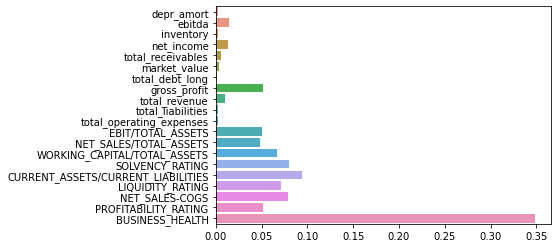

In [68]:
sms.barplot(y=X_train.columns, x = clf.feature_importances_)

In [34]:
for max_d in range(1, 50, 1):
    model = RandomForestClassifier(max_features = max_d, random_state=42)
    model.fit(X_train, y_train)
    print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(X_train, y_train))
    print('The Validation Accuracy for max_depth {} is:'.format(max_d), model.score(X_test, y_test))
    print('')

The Training Accuracy for max_depth 1 is: 1.0
The Validation Accuracy for max_depth 1 is: 0.496551724137931

The Training Accuracy for max_depth 2 is: 1.0
The Validation Accuracy for max_depth 2 is: 0.5038539553752536

The Training Accuracy for max_depth 3 is: 1.0
The Validation Accuracy for max_depth 3 is: 0.5030425963488844



KeyboardInterrupt: 

## Test Cells


In [ ]:
sms.barplot(y=X_train.columns, x = classifier.feature_importances_)

from sklearn.metrics import r2_score, mean_squared_error

# TESTING CELLS WILL DELETE
def performance(y1_true, y1_predict):
    """ 
    Calculates and returns the two performance scores between 
    true and predicted values - first R-Squared, then RMSE
    """

    # Calculate the r2 score between 'y_true' and 'y_predict'
    r2 = r2_score(y1_true, y1_predict)

    # Calculate the root mean squared error between 'y_true' and 'y_predict'
    rmse = mean_squared_error(y1_true, y1_predict, squared=False)

    # If using an older version of sklearn:
    # rmse = np.sqrt(mean_squared_error(y_true, y_predict))

    # Return the score
    return [r2, rmse]

In [ ]:
y1 = df_sub['BUSINESS_HEALTH']
X1 = df_sub.drop("BUSINESS_HEALTH", axis=1).select_dtypes("number")
#X1 = df_sub[['EBIT/TOTAL_ASSETS', 'NET_SALES/TOTAL_ASSETS', 'WORKING_CAPITAL/TOTAL_ASSETS', 'NET_SALES-COGS']]


# Split into training and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=45)

dt = DecisionTreeClassifier(criterion='entropy', random_state=45)  
dt.fit(X_train, y_train) 

y1_pred = dt.predict(X1_test)

# Check the AUC of predictions
acc1 = accuracy_score(y1_test,y1_pred) * 100
print('Accuracy is :{0}'.format(acc1))

print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y1_test, y1_pred, rownames=['True'], colnames=['Predicted'], margins=True)





In [ ]:
max_depths = list(range(1, 31))
mse_results = []
r2_results = []

for max_depth in max_depths:
    regressor = DecisionTreeClassifier(criterion='entropy', max_depth = max_depth, random_state=45)  
    
    
    regressor.fit(X1_train, y1_train) 
    y1_pred = regressor.predict(X1_test)
    score = performance(y1_test, y1_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(max_depths, r2_results, 'b', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(max_depths, mse_results, 'r', label='RMSE')
plt.xlabel('Tree Depth')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [ ]:
#min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_splits = list(range(2, 100))
mse_results = []
r2_results = []

for min_samples_split in min_samples_splits:    
    regressor = DecisionTreeClassifier(criterion='entropy',min_samples_split=int(min_samples_split), random_state=45)  

    regressor.fit(X1_train, y1_train) 
    y1_pred = regressor.predict(X1_test)
    score = performance(y1_test, y1_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, r2_results, 'b', label='R2')
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, mse_results, 'r', label='RMSE')
plt.show()

In [ ]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
mse_results = []
r2_results = []

for min_samples_leaf in min_samples_leafs:    
    regressor = DecisionTreeClassifier(criterion='entropy',min_samples_leaf= min_samples_leaf, random_state=45)  

    regressor.fit(X1_train, y1_train) 
    y1_pred = regressor.predict(X1_test)
    score = performance(y1_test, y1_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(min_samples_leafs, r2_results, 'b', label='R2')
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(min_samples_leafs, mse_results, 'r', label='RMSE')
plt.show()